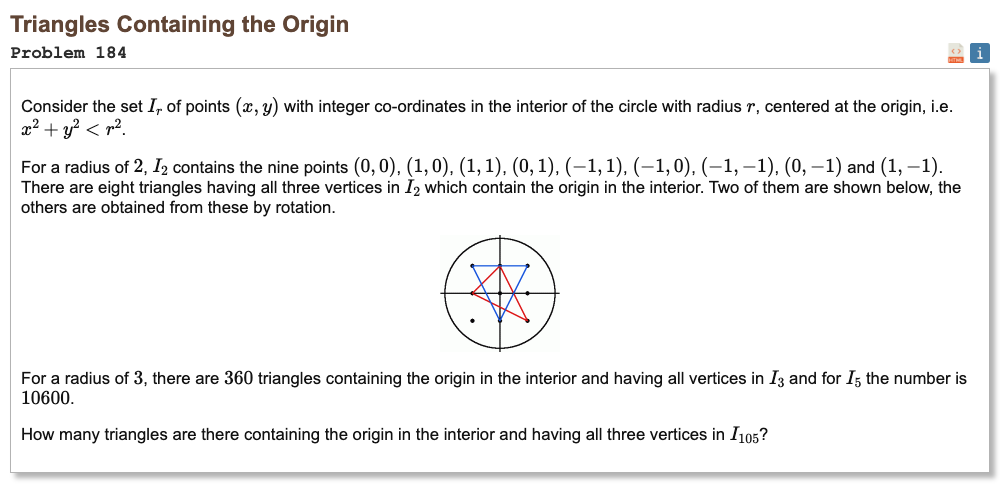

## Initial approach

* pick all primitive directions inside the circle
* give each direction a weight by counting how many multiples fit inside
* sort directions by angle
* add all triples of directions using their weights
* find triples that fit inside an open semicircle
* subtract those because they cannot contain the origin
* count triples that use a direction and its opposite
* subtract those too, the rest are the valid origin containing triangles

In [1]:
import math
from math import gcd

def count_triangles(R):
    dirs = []
    R2 = R * R
    limit = R2 - 1
    for x in range(-R + 1, R):
        for y in range(-R + 1, R):
            if x == 0 and y == 0:
                continue
            if x * x + y * y >= R2:
                continue
            g = gcd(abs(x), abs(y))
            if g != 1:
                continue
            L2 = x * x + y * y
            T = limit // L2
            tmax = int(math.isqrt(T))
            if tmax <= 0:
                continue
            dirs.append((x, y, tmax))
    M = len(dirs)
    angles = []
    weights = []
    vecs = []
    for x, y, m in dirs:
        ang = math.atan2(y, x)
        if ang < 0:
            ang += 2 * math.pi
        angles.append(ang)
        weights.append(m)
        vecs.append((x, y))
    order = sorted(range(M), key=lambda i: angles[i])
    angles = [angles[i] for i in order]
    weights = [weights[i] for i in order]
    vecs = [vecs[i] for i in order]
    M = len(angles)
    S1 = sum(weights)
    S2 = sum(w * w for w in weights)
    S3 = sum(w * w * w for w in weights)
    total_dir = (S1 * S1 * S1 - 3 * S1 * S2 + 2 * S3) // 6
    angle_ext = angles + [a + 2 * math.pi for a in angles]
    w_ext = weights + weights
    bad_semi = 0
    j = 0
    S1w = 0
    S2w = 0
    eps = 1e-12
    for i in range(M):
        if j < i + 1:
            j = i + 1
            S1w = 0
            S2w = 0
        while j < i + M and angle_ext[j] - angle_ext[i] < math.pi - eps:
            w = w_ext[j]
            S1w += w
            S2w += w * w
            j += 1
        if S1w > 0:
            pairs = (S1w * S1w - S2w) // 2
            bad_semi += weights[i] * pairs
        if j > i + 1:
            wrem = w_ext[i + 1]
            S1w -= wrem
            S2w -= wrem * wrem
    index_map = {vecs[i]: i for i in range(M)}
    anti = 0
    for i, (x, y) in enumerate(vecs):
        if y > 0 or (y == 0 and x > 0):
            j = index_map.get((-x, -y))
            if j is None:
                continue
            m1 = weights[i]
            m2 = weights[j]
            pair = m1 * m2
            third_sum = S1 - m1 - m2
            anti += pair * third_sum
    good = total_dir - bad_semi - anti
    return good

def euler184():
    return count_triangles(105)

In [2]:
%%time

result = euler184()
print("Result:", result)

Result: 1725323624056
CPU times: user 41.2 ms, sys: 2.25 ms, total: 43.5 ms
Wall time: 42.7 ms
